In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mathDf=pd.read_csv("performance_math.csv")

print("mathDF shape:",mathDf.shape)

langDf=pd.read_csv("performance_lang.csv")

print("langDF shape:",langDf.shape)


mathDF shape: (395, 25)
langDF shape: (649, 25)


## DATA CLEANING AND MERGING TO FIND STUDENTS WHO TAKE BOTH SUBJECTS

__Assumption__: students take different amount of absences for math and lang classes, hence check duplicates after dropping absecences and grades columns

In [3]:
mathDfcpy=mathDf.drop(columns="Absences")

langDfcpy=langDf.drop(columns="Absences")

langDfcpy=langDfcpy.rename(columns={"T1":"L_T1","T2":"L_T2","T3":"L_T3"})
combinedDf=mathDfcpy.merge(langDfcpy,how="outer",indicator=True)

combinedDf=combinedDf[combinedDf._merge=="both"]
combinedDf.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,FreeTime,GoingOut,Health,T1,T2,T3,L_T1,L_T2,L_T3,_merge
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,3,4,3,5.0,6.0,6.0,0.0,11.0,11.0,both
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,3,3,3,5.0,5.0,6.0,9.0,11.0,11.0,both
6,SchoolA,Male,16,Urban,2,2,Other,Other,1,2,...,4,4,3,12.0,12.0,11.0,13.0,12.0,13.0,both
7,SchoolA,Female,17,Urban,4,4,Other,Teacher,2,2,...,1,4,1,6.0,5.0,6.0,10.0,13.0,13.0,both
11,SchoolA,Female,15,Urban,2,1,CivilService,Other,3,3,...,2,2,4,10.0,12.0,12.0,10.0,12.0,13.0,both


## Q1 : Does the family background, family relationship and family support influence a student's performance?

In [4]:
math_result=pd.DataFrame(mathDf[['T1','T2','T3']])
math_result["Mean Math Score"]=(math_result["T1"]+math_result["T2"]+math_result["T3"])/3
math_result.head()

mean_math=pd.DataFrame(math_result["Mean Math Score"])
mean_math.head(5)

,Mean Math Score
0,5.666667
1,5.333333
2,8.333333
3,14.666667
4,8.666667


In [5]:
lang_result=pd.DataFrame(langDf[['T1','T2','T3']])
lang_result["Mean Lang Score"]=(lang_result["T1"]+lang_result["T2"]+lang_result["T3"])/3
lang_result.head()

mean_lang=pd.DataFrame(lang_result["Mean Lang Score"])
mean_lang.head()

,Mean Lang Score
0,7.333333
1,10.333333
2,12.333333
3,14.000000
4,12.333333


In [6]:
Family_math_cat=pd.DataFrame(mathDf[["FamilySup","MomJob","DadJob"]])
Family_lang_cat=pd.DataFrame(langDf[["FamilySup","MomJob","DadJob"]])

Family_math_num=pd.DataFrame(mathDf[["FamilyRel","MomEdu","DadEdu"]])
Family_lang_num=pd.DataFrame(langDf[["FamilyRel","MomEdu","DadEdu"]])

## DATA VISUALIZATION ON BOTH MATH AND LANG SUBJECT MEAN GRADES

<AxesSubplot:>

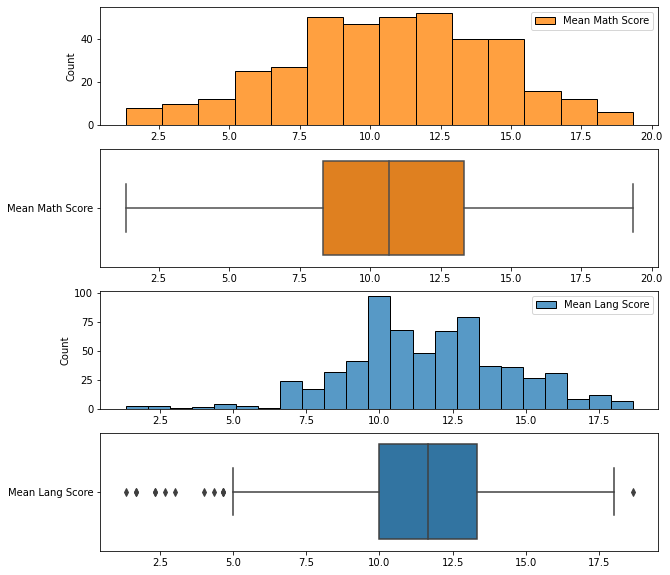

In [7]:
f,axes=plt.subplots(4,1,figsize=(10,10))
sb.histplot(data=mean_math,ax=axes[0],palette="autumn")
sb.boxplot(data=mean_math,orient="h",ax=axes[1],palette="autumn")
sb.histplot(data=mean_lang,ax=axes[2])
sb.boxplot(data=mean_lang,orient="h",ax=axes[3])


In [8]:
print(mean_math.describe())
print("\t")
print(mean_lang.describe())

       Mean Math Score
count       395.000000
mean         10.679325
std           3.696786
min           1.333333
25%           8.333333
50%          10.666667
75%          13.333333
max          19.333333
	
       Mean Lang Score
count       649.000000
mean         11.625064
std           2.833360
min           1.333333
25%          10.000000
50%          11.666667
75%          13.333333
max          18.666667


In [9]:
def print_boxplots(a,b):
    f,axes=plt.subplots(b.shape[1],1,figsize=(12,15))
    Df=pd.concat([a,b],axis=1)

    for i in range(b.shape[1]):
        sb.boxplot(data=Df,y=str(b.columns[i]),x=str(a.columns[0]),orient="h",ax=axes[i])
        
def print_barplots(a,b):
    f,axes=plt.subplots(b.shape[1],1,figsize=(8,15))
    Df=pd.concat([a,b],axis=1)

    for i in range(b.shape[1]):
        sb.barplot(data=Df,x=str(b.columns[i]),y=str(a.columns[0]),orient="v",ax=axes[i])
        
#variable a is numerical Df, while variable b is catergorical Df#

## EXPLORING FAMILY BACKGROUND FACTORS AND STUDENT PERFORMANCE RELATIONSHIP

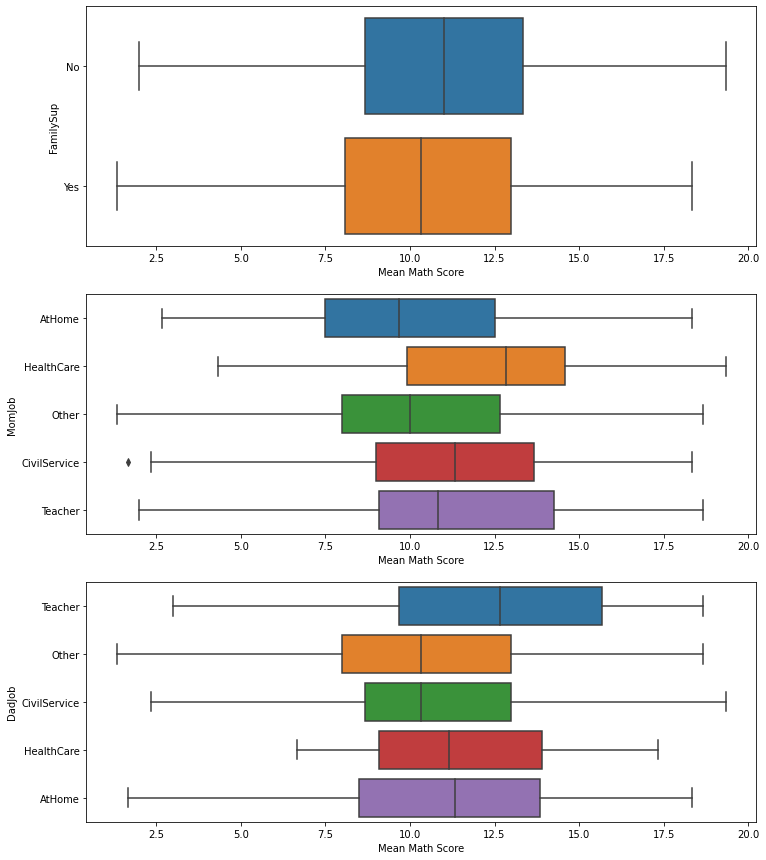

In [10]:
print_boxplots(mean_math,Family_math_cat)

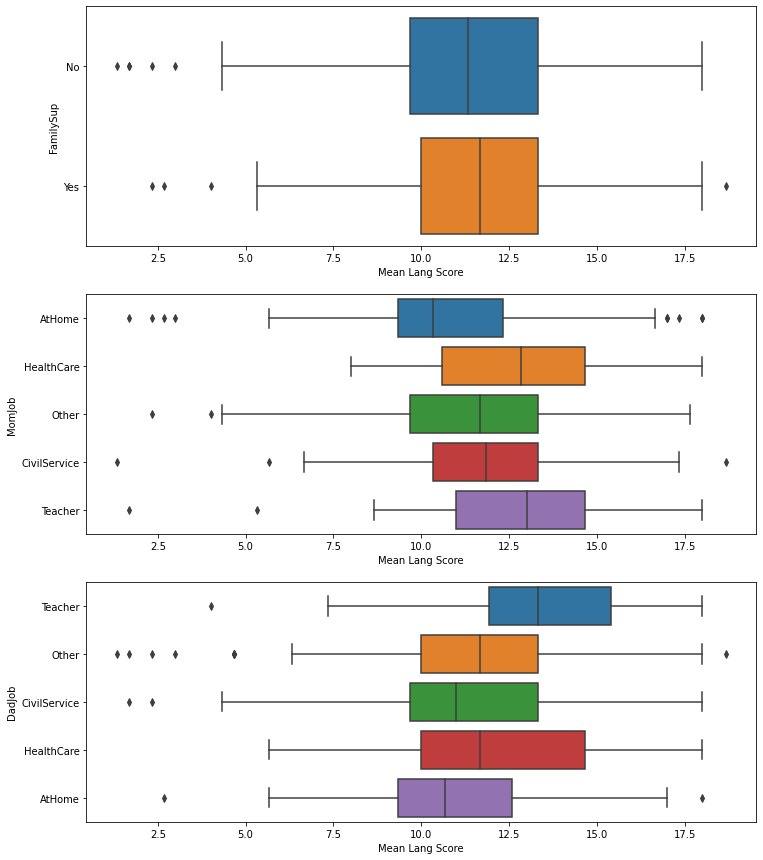

In [11]:
print_boxplots(mean_lang,Family_lang_cat)

From the boxplots comparing the categorical family data against both math and lang scores, it can be concluded that:
  - The existence of family support has __negligent effect__ on student performance, since boxplots of scores almost           identical.
  
  - Both parent's job has __moderate effect__ on student performance, student's whose parents work at home tend to             have worse academic performance, while student's whose mum work in the healthcare industry are likely to       have better performance in general.


<AxesSubplot:>

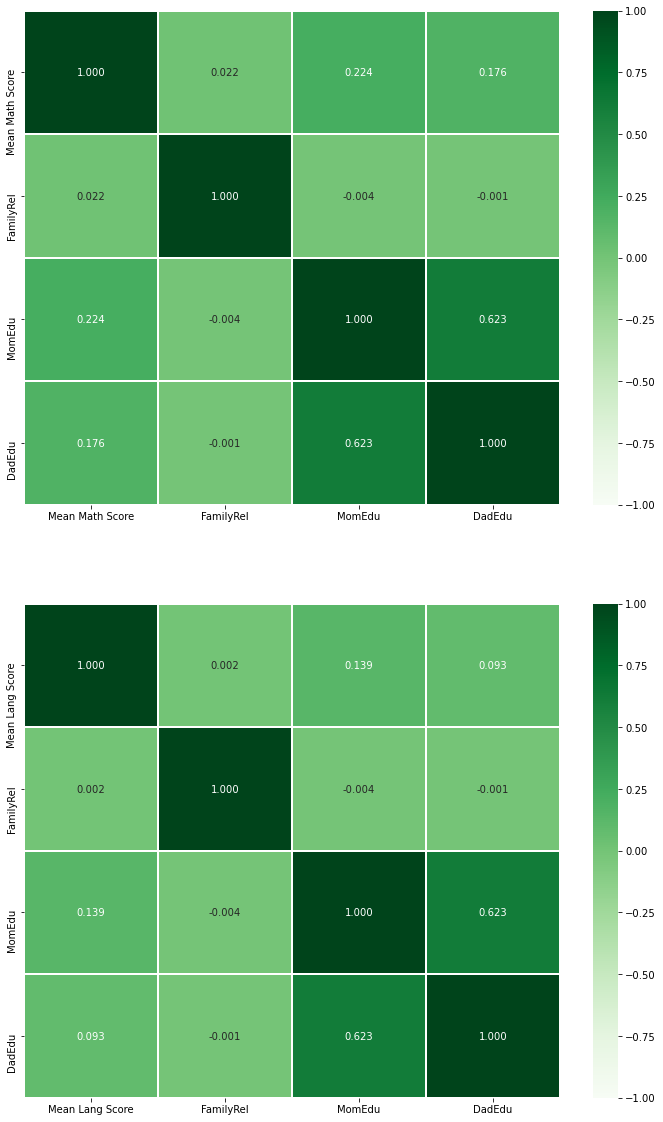

In [12]:
f,axes=plt.subplots(2,1,figsize=(12,20))
Df_math=pd.concat([mean_math,Family_math_num],axis=1)
Df_lang=pd.concat([mean_lang,Family_math_num],axis=1)

sb.heatmap( Df_math.corr(), vmin=-1,vmax=1,linewidths=1,annot=True,fmt=".3f", annot_kws = {"size": 10}, cmap = "Greens",ax=axes[0])
sb.heatmap( Df_lang.corr(), vmin=-1,vmax=1,linewidths=1,annot=True,fmt=".3f", annot_kws = {"size": 10}, cmap = "Greens",ax=axes[1])




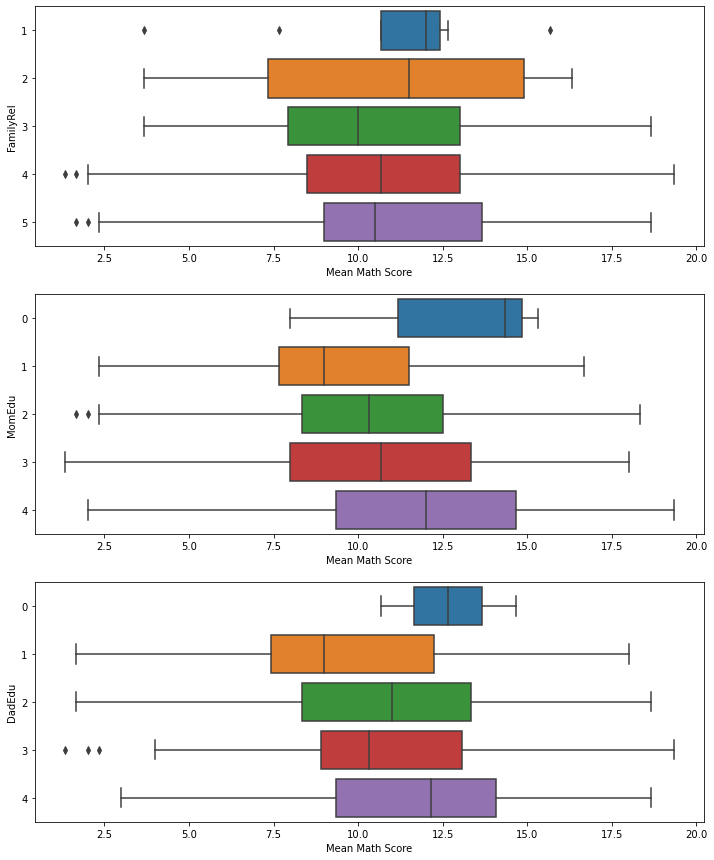

In [13]:
print_boxplots(mean_math,Family_math_num)

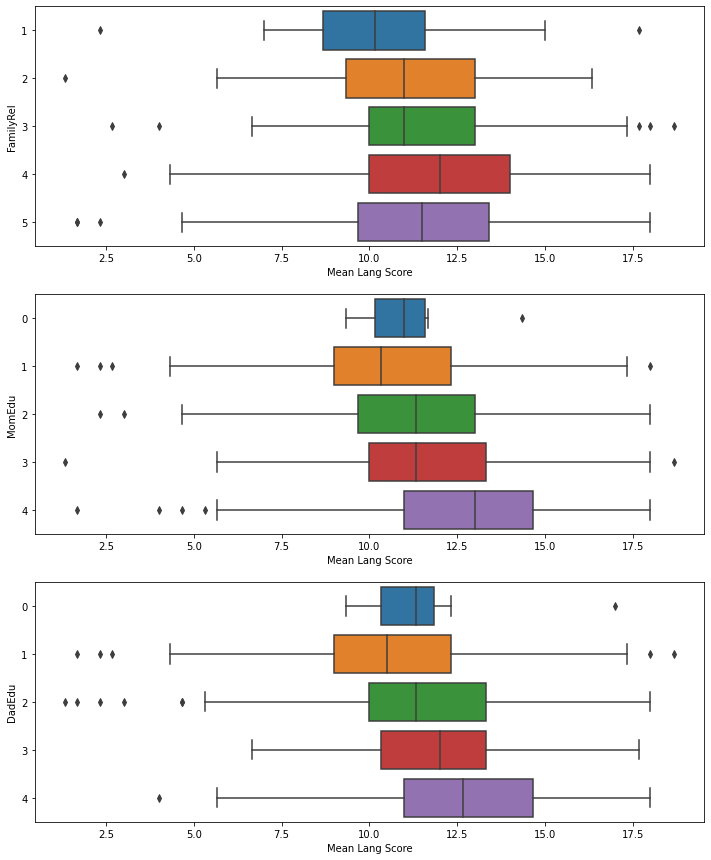

In [14]:
print_boxplots(mean_lang,Family_lang_num)

From the correlation matrix of numeric family data along with both math and lang scores, it can be concluded that:
  - Parent's education level and strength of family relationships has a correlation with student scores of < 0.3,         indicating that there is __moderately weak linear relationship__ between the aforementioned variables and student     performance.
  
  - Mom's education level has the __highest correlation__ to both math and lang scores, with a score of 0.224 and 0.139       respectively.
  

In [15]:
print("Dad education rating is 0(lang): ",Family_lang_num["DadEdu"].value_counts().iloc[4])
print("Dad education rating is 0(math): ",Family_math_num["DadEdu"].value_counts().iloc[4])
print("Mom education rating is 0(lang): ",Family_lang_num["MomEdu"].value_counts().iloc[4])
print("Mom education rating is 0(math): ",Family_math_num["MomEdu"].value_counts().iloc[4])


print("Number of parents with education rating of 0 is too small to be considered for an accurate boxplot!")

Dad education rating is 0(lang):  7
Dad education rating is 0(math):  2
Mom education rating is 0(lang):  6
Mom education rating is 0(math):  3
Number of parents with education rating of 0 is too small to be considered for an accurate boxplot!


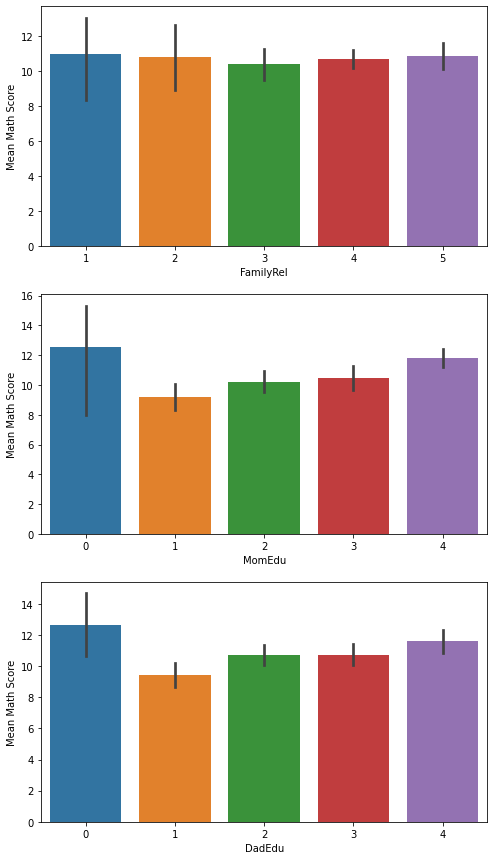

In [16]:
print_barplots(mean_math,Family_math_num)

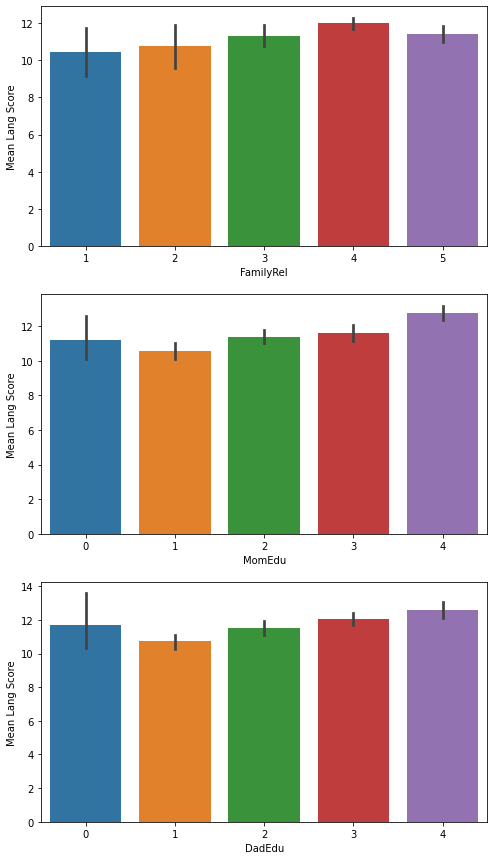

In [17]:
print_barplots(mean_lang,Family_lang_num)

## Q1)

   
1) Therefore, after doing EDA, there is not enough evidence to show that family background factors such as parents job has a significant impact on student performance. However, parents job does have a small influence on student performance. For example, if a student's dad's job is a teacher or mum's job being in the healthcare industry does result in better median grade for both subjects. 


2) The family relationship has almost no effect on student performance as is has a correlation of <0.03 with both subject scores and there is no clear trend in their boxplots. After analysing the boxplots, existence of family support does not seem influence the grades of the student, since they are more or less the same for yes and no.


3) Lastly, there is a general positive linear trend between student performance and parents education, after not considering those parents education rating of 0 since there is too little data to plot an accurate boxplot that can be used for comparison. Using a barplot, this trend can be seen clearly. Hence, higher parents education level of parents does influence student performance to be better.
  
  

  



## Q2) What can a student do (attributes that they can control) to improve their performance in these subjects?

In [18]:
studentchoices_math_num=pd.DataFrame(mathDf[["StudyTime","GoingOut","Absences"]])
studentchoices_math_cat=pd.DataFrame(mathDf[["Activities","Romantic"]])

studentchoices_lang_num=pd.DataFrame(langDf[["StudyTime","GoingOut","Absences"]])
studentchoices_lang_cat=pd.DataFrame(langDf[["Activities","Romantic"]])



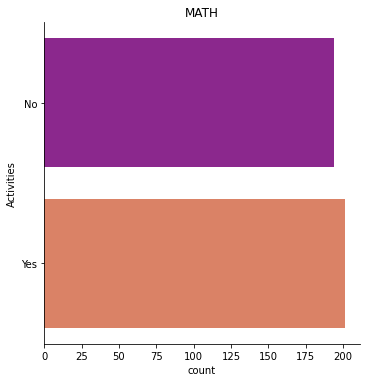

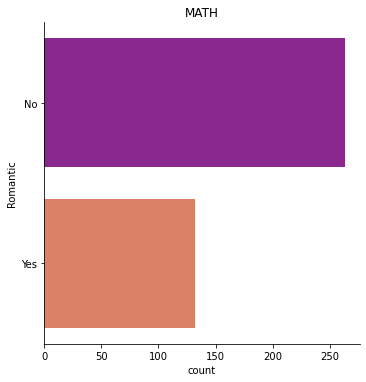

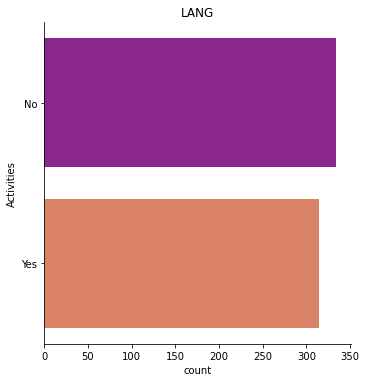

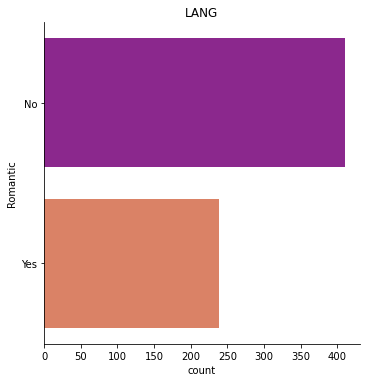

In [19]:
studentchoices_math_cat=studentchoices_math_cat.astype("category")
studentchoices_math_cat.dtypes

sb.catplot(data=studentchoices_math_cat,y="Activities",kind="count",palette="plasma").set(title="MATH")
sb.catplot(data=studentchoices_math_cat,y="Romantic",kind="count",palette="plasma").set(title="MATH")
sb.catplot(data=studentchoices_lang_cat,y="Activities",kind="count",palette="plasma").set(title="LANG")
sb.catplot(data=studentchoices_lang_cat,y="Romantic",kind="count",palette="plasma").set(title="LANG")

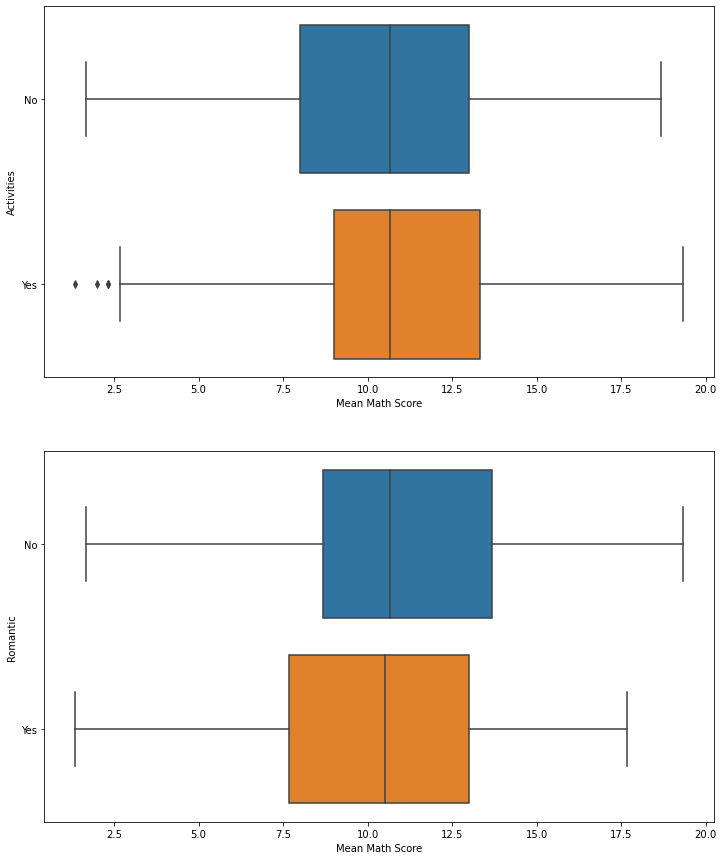

In [20]:
print_boxplots(mean_math,studentchoices_math_cat)

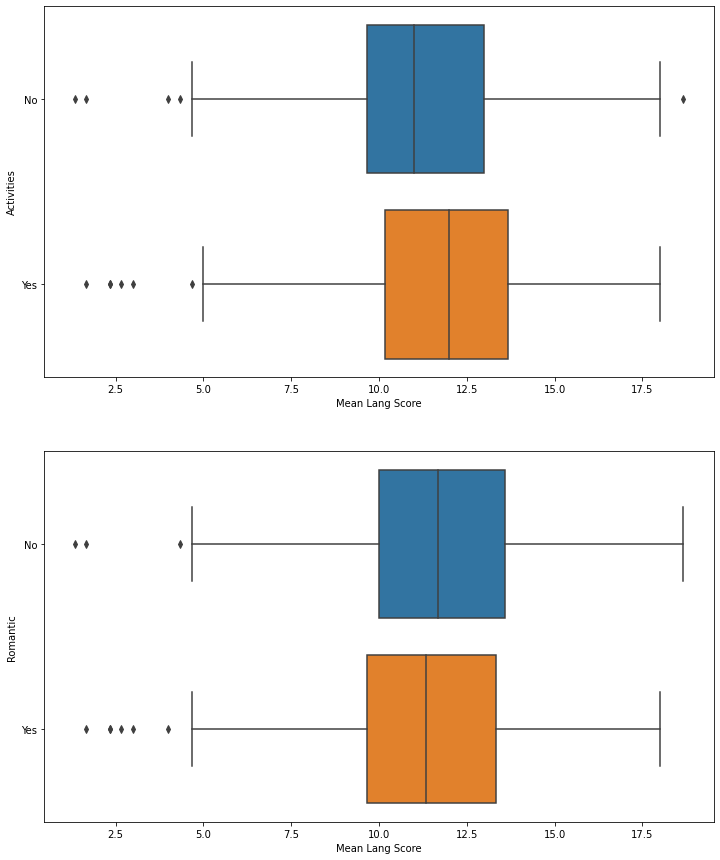

In [21]:
print_boxplots(mean_lang,studentchoices_lang_cat)

Analysing the boxplots for the variables Activities and Relationship status, there is __no clear indication__ of strong influence on academic performance for both subjects, since their boxplots are mostly similar. However, it should be noted that there is a higher number of outliers for the boxplots for those with co-curricular actitivies compared to those without, with extremely low scores for math. There is also a slightly lower median for those who are in relationships compared to those who are not, indicating that existence of relationships can slightly affect student performance negatively.

<AxesSubplot:>

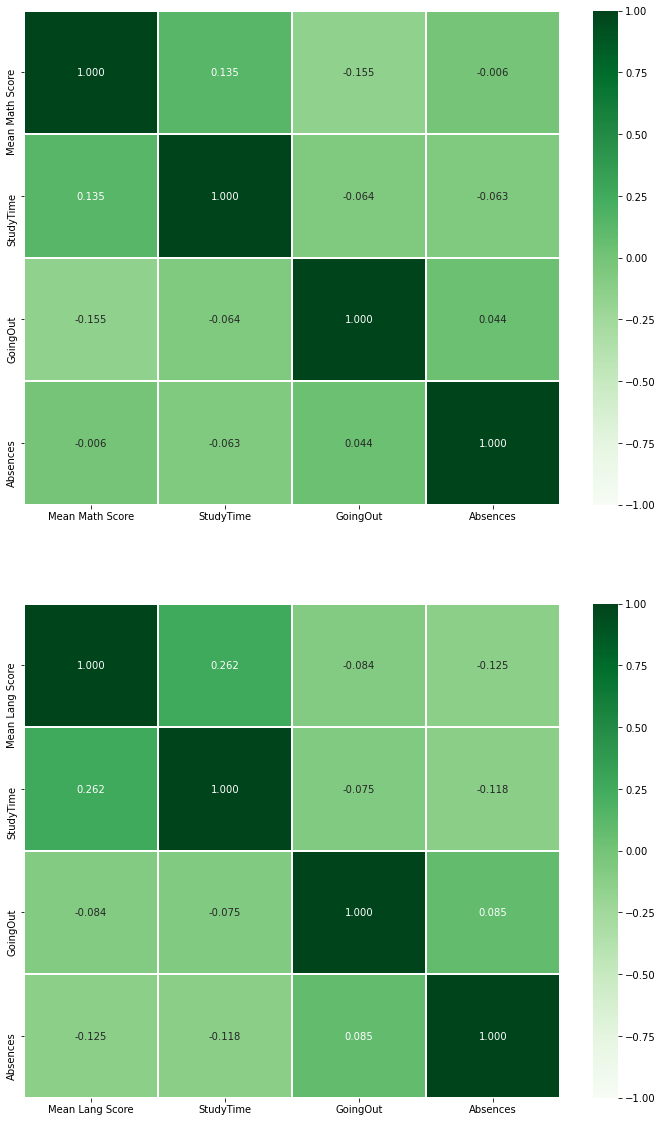

In [22]:
f,axes=plt.subplots(2,1,figsize=(12,20))
Df_math=pd.concat([mean_math,studentchoices_math_num],axis=1)
Df_lang=pd.concat([mean_lang,studentchoices_lang_num],axis=1)

sb.heatmap( Df_math.corr(), vmin=-1,vmax=1,linewidths=1,annot=True,fmt=".3f", annot_kws = {"size": 10}, cmap = "Greens",ax=axes[0])
sb.heatmap( Df_lang.corr(), vmin=-1,vmax=1,linewidths=1,annot=True,fmt=".3f", annot_kws = {"size": 10}, cmap = "Greens",ax=axes[1])

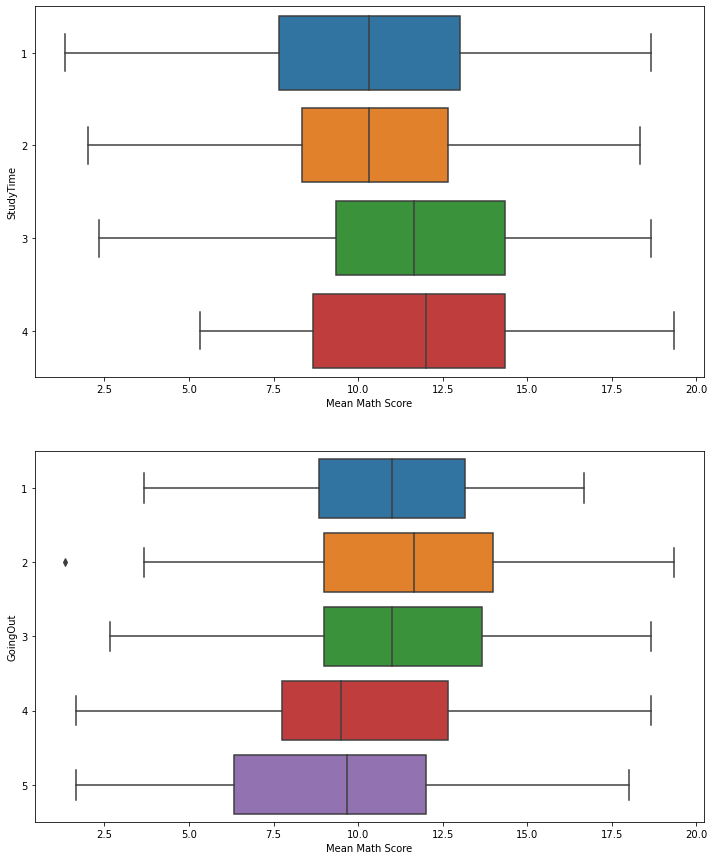

In [23]:
studentchoices_math_num.drop(columns="Absences",inplace=True)
print_boxplots(mean_math,studentchoices_math_num)

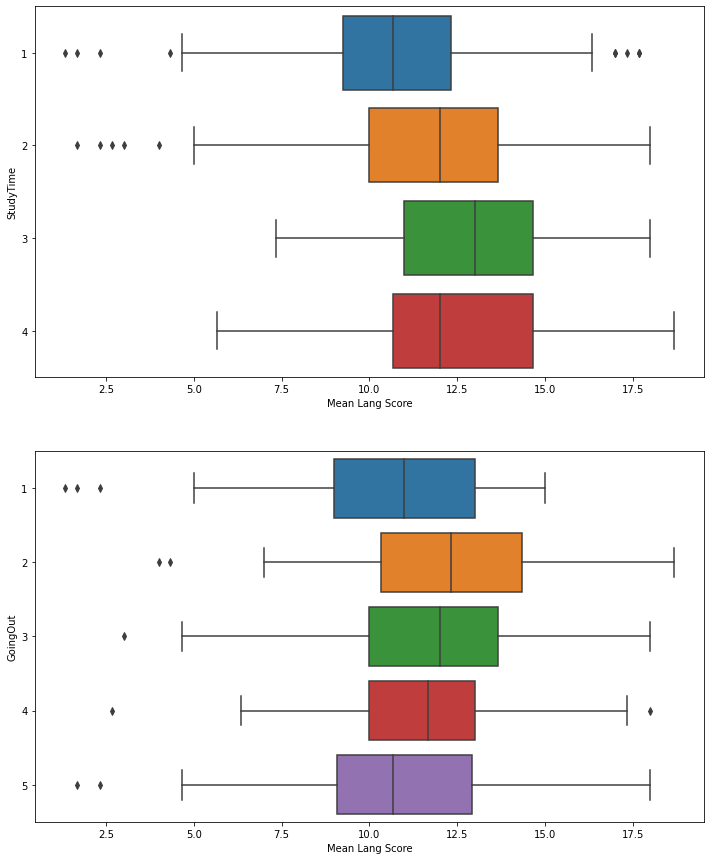

In [24]:
studentchoices_lang_num.drop(columns="Absences",inplace=True)
print_boxplots(mean_lang,studentchoices_lang_num)

Next, after finding the correlation between mean scores and other variables, it can be seen that there is __moderately weak relationship__ between study time and academic performance, since both subjects have (corr <0.3), while going out has almost negligent correlation with mean scores. 


Using a boxplot to explore further, there is a __slight increasing trend__ for median math marks with higher studying time. A study time of < 2 hours a week does result in a higher variance of boxplots of scores, with some extremely low outliers for mean math grade. For both subjects, a going out value of 2 results in the highest median grade for both subjects, and the 25 percentile extremely high for lang grades. This implies that this is likely the most appropriate amount of going out time if a student wants to achieve better results.

In [25]:
math_result0=pd.DataFrame(mathDf[mathDf["Absences"]!= 0])
math_result0=pd.DataFrame(math_result0[['T1','T2','T3']])
math_result0["Mean Math Score"]=(math_result0["T1"]+math_result0["T2"]+math_result0["T3"])/3

math_result1=pd.DataFrame(mathDf[mathDf["Absences"]==0])
math_result1=pd.DataFrame(math_result1[['T1','T2','T3']])
math_result1["Mean Math Score"]=(math_result1["T1"]+math_result1["T2"]+math_result1["T3"])/3



mean_math0=pd.DataFrame(math_result0["Mean Math Score"])
mean_math1=pd.DataFrame(math_result1["Mean Math Score"])

Absences_math=pd.DataFrame(mathDf["Absences"])
Absences_math=Absences_math[Absences_math["Absences"]!=0]

Df0=pd.concat([mean_math0,Absences_math],axis=1)
Df0.corr()


,Mean Math Score,Absences
Mean Math Score,1.000000,-0.142973
Absences,-0.142973,1.000000


In [26]:
lang_result0=pd.DataFrame(langDf[langDf["Absences"]!=0])
lang_result0=pd.DataFrame(lang_result0[['T1','T2','T3']])
lang_result0["Mean Lang Score"]=(lang_result0["T1"]+lang_result0["T2"]+lang_result0["T3"])/3
lang_result0.head()

mean_lang0=pd.DataFrame(lang_result0["Mean Lang Score"])

Absences_lang=pd.DataFrame(langDf["Absences"])
Absences_lang=Absences_lang[Absences_lang["Absences"]!=0]

Df0=pd.concat([mean_lang0,Absences_lang],axis=1)
Df0.corr()

,Mean Lang Score,Absences
Mean Lang Score,1.000000,-0.129467
Absences,-0.129467,1.000000


Lastly, after cleaning the data, __there is weak negative linear__ relationship between amount of absences >0 and student performances, since correlation is about -0.13 to -0.14 for both subjects.

## Q2)


__In conclusion, a student can:__
- Study more than 10 hours a week if they want to improve their math grades
- Do not study less than 2 hours a week if students want to keep their expected grade range smaller
- Go out with friends a moderately low amount of hours a week
- Still have both CCA and Relationships, keeping in mind to not compromise study time
- Try to be absent less times from school

## Q3) What can schools do (attributes that they can control) to help students perform better in these subjects?

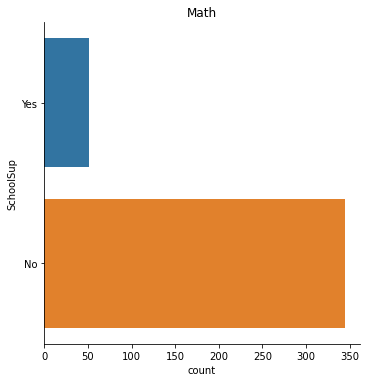

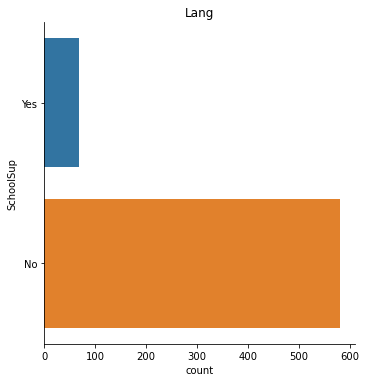

In [27]:
schoolchoices_math=pd.DataFrame(mathDf[["SchoolSup","FreeTime"]])
schoolchoices_lang=pd.DataFrame(langDf[["SchoolSup","FreeTime"]])


sb.catplot(data=schoolchoices_math,y="SchoolSup",kind="count").set(title="Math")
sb.catplot(data=schoolchoices_lang,y="SchoolSup",kind="count").set(title="Lang")


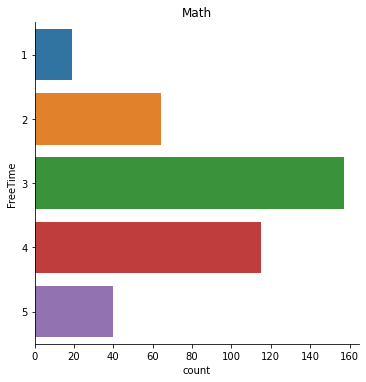

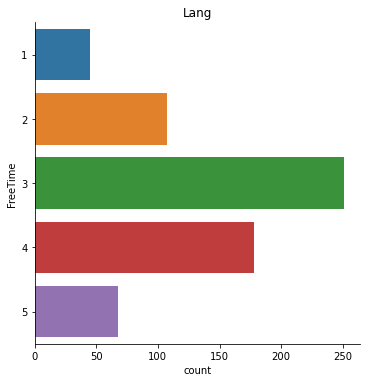

In [28]:
sb.catplot(data=schoolchoices_math,y="FreeTime",kind="count").set(title="Math")
sb.catplot(data=schoolchoices_lang,y="FreeTime",kind="count").set(title="Lang")


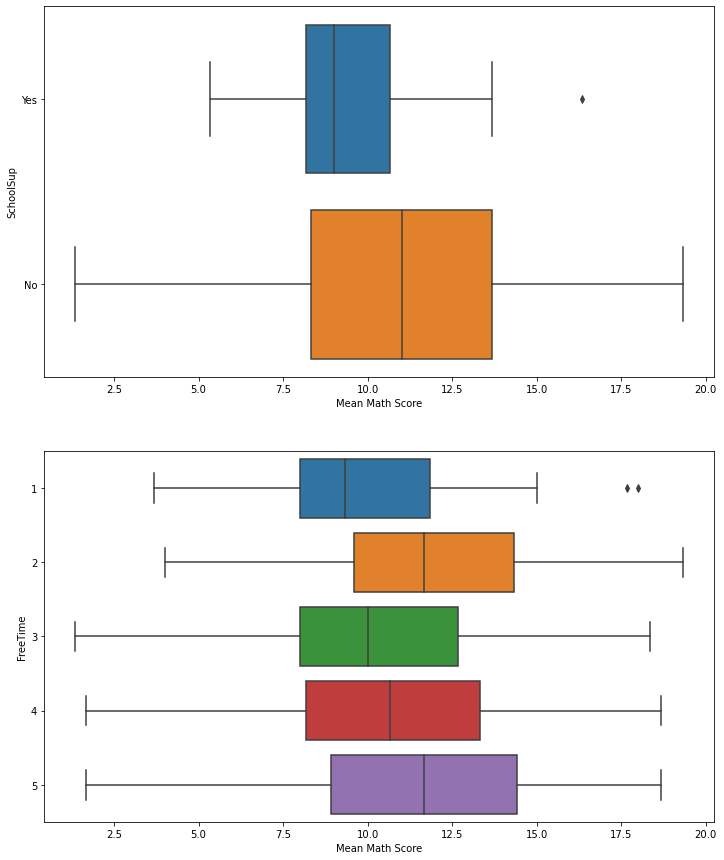

In [29]:
print_boxplots(mean_math,schoolchoices_math)

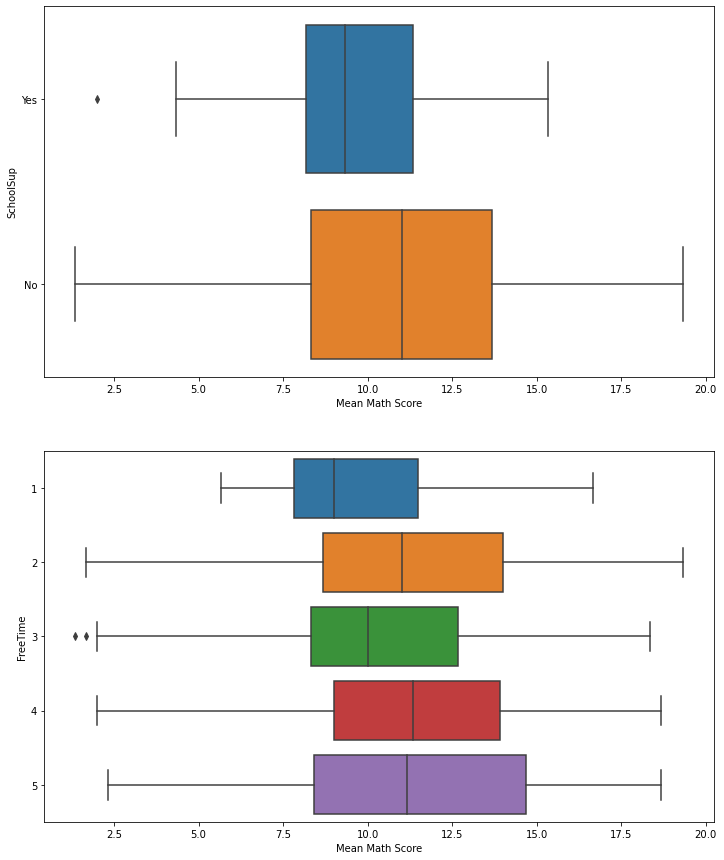

In [30]:
print_boxplots(mean_math,schoolchoices_lang)

## Upon further analysis, the school sup variable should be compared over T1,T2,T3 to see if there is improvement of grades after supplementary classes.

[Text(0.5, 1.0, 'TERM3')]

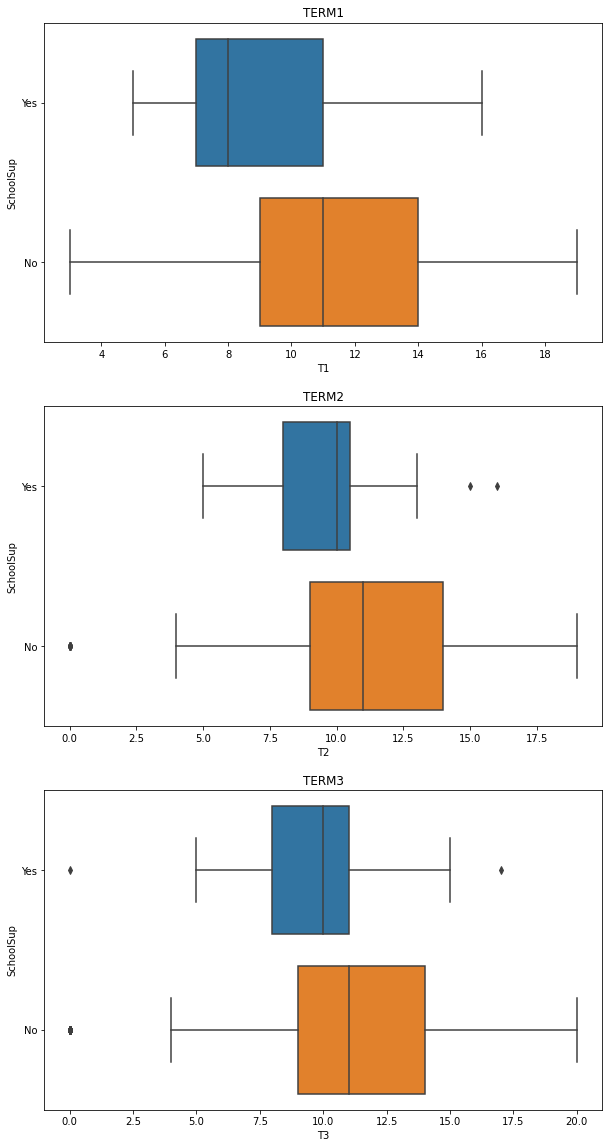

In [31]:
terms_scores_math=pd.DataFrame(mathDf[['T1','T2','T3']])
terms_scores_lang=pd.DataFrame(langDf[['T1','T2','T3']])

SchoolSup_math=pd.DataFrame(mathDf["SchoolSup"])
SchoolSup_lang=pd.DataFrame(langDf["SchoolSup"])

Df_math=pd.concat([terms_scores_math,SchoolSup_math],axis=1)



f,axes=plt.subplots(3,1,figsize=(10,20))
sb.boxplot(data=Df_math,x=terms_scores_math.columns[0],y="SchoolSup",orient="h",ax=axes[0]).set(title="TERM1")
sb.boxplot(data=Df_math,x=terms_scores_math.columns[1],y="SchoolSup",orient="h",ax=axes[1]).set(title="TERM2")
sb.boxplot(data=Df_math,x=terms_scores_math.columns[2],y="SchoolSup",orient="h",ax=axes[2]).set(title="TERM3")



## Q3)

Analysing the boxplots for variable FreeTime, we can see that :

   - There is a __general positive__ trend between free time and student performance for both subjects.

   - A free time rating of 2 and 5 generates the best results overall.
   
Analysing the boxplots for variable SchoolSup, we can see that :
   
   - The students who were given school supplementary were those did poorer in Term 1.
   
   - Student performance did improve for those with school supplementary from Term 1 to Term 3 for both subjects.
   
   
In conclusion, schools can:
   - Modify their curriculum to give a more amount of free time to students
   - Allow students to have more free time
   - Give school supplementary classes for students who need it
   
   







## Q4) Which school has a better overall student performance in these two subjects? Why do you think that is?

Mean Math Score    10.737345
dtype: float64
Mean Lang Score    12.235619
dtype: float64


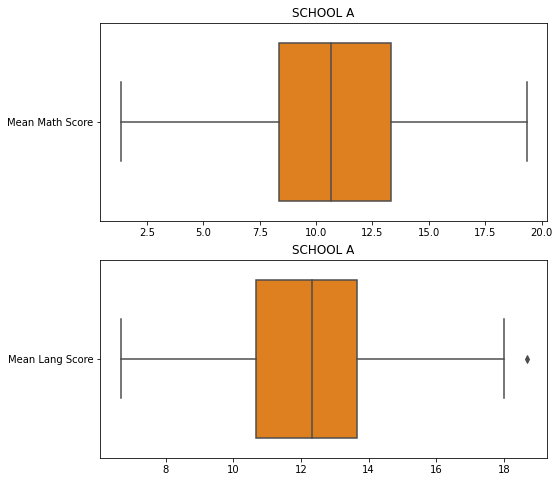

In [32]:
schoolA_math=pd.DataFrame(mathDf[mathDf["School"]=="SchoolA"])
schoolA_lang=pd.DataFrame(langDf[langDf["School"]=="SchoolA"])
schoolB_math=pd.DataFrame(mathDf[mathDf["School"]=="SchoolB"])
schoolB_lang=pd.DataFrame(langDf[langDf["School"]=="SchoolB"])


f,axes=plt.subplots(2,1,figsize=(8,8))

temp=pd.DataFrame(schoolA_math[['T1','T2','T3']])
temp["Mean Math Score"]=(temp["T1"]+temp["T2"]+temp["T3"])/3
schoolA_math=pd.DataFrame(temp["Mean Math Score"])



sb.boxplot(data=schoolA_math,orient="h",ax=axes[0],palette="autumn").set(title="SCHOOL A")

print(schoolA_math.mean())


temp=pd.DataFrame(schoolA_lang[['T1','T2','T3']])
temp["Mean Lang Score"]=(temp["T1"]+temp["T2"]+temp["T3"])/3
schoolA_lang=pd.DataFrame(temp["Mean Lang Score"])

sb.boxplot(data=schoolA_lang,orient="h",ax=axes[1],palette="autumn").set(title="SCHOOL A")

print(schoolA_lang.mean())


Mean Math Score    10.23913
dtype: float64
Mean Lang Score    10.482301
dtype: float64


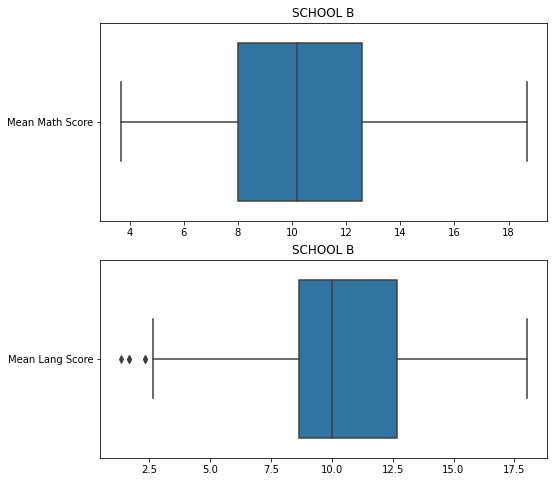

In [33]:
f,axes=plt.subplots(2,1,figsize=(8,8))

temp=pd.DataFrame(schoolB_math[['T1','T2','T3']])
temp["Mean Math Score"]=(temp["T1"]+temp["T2"]+temp["T3"])/3
schoolB_math=pd.DataFrame(temp["Mean Math Score"])

sb.boxplot(data=schoolB_math,orient="h",ax=axes[0]).set(title="SCHOOL B")

print(schoolB_math.mean())

temp=pd.DataFrame(schoolB_lang[['T1','T2','T3']])
temp["Mean Lang Score"]=(temp["T1"]+temp["T2"]+temp["T3"])/3
schoolB_lang=pd.DataFrame(temp["Mean Lang Score"])

sb.boxplot(data=schoolB_lang,orient="h",ax=axes[1]).set(title="SCHOOL B")
print(schoolB_lang.mean())


## School A has a better performance than school B for both subjects.






In [34]:
schoolA_math0=pd.DataFrame(mathDf[mathDf["School"]=="SchoolA"])
schoolA_lang0=pd.DataFrame(langDf[langDf["School"]=="SchoolA"])
schoolB_math0=pd.DataFrame(mathDf[mathDf["School"]=="SchoolB"])
schoolB_lang0=pd.DataFrame(langDf[langDf["School"]=="SchoolB"])


schoolA_math_useful=pd.DataFrame(schoolA_math0[["MomEdu","DadEdu","StudyTime","GoingOut","FreeTime"]])
schoolA_lang_useful=pd.DataFrame(schoolA_lang0[["MomEdu","DadEdu","StudyTime","GoingOut","FreeTime"]])

schoolB_math_useful=pd.DataFrame(schoolB_math0[["MomEdu","DadEdu","StudyTime","GoingOut","FreeTime"]])
schoolB_lang_useful=pd.DataFrame(schoolB_lang0[["MomEdu","DadEdu","StudyTime","GoingOut","FreeTime"]])



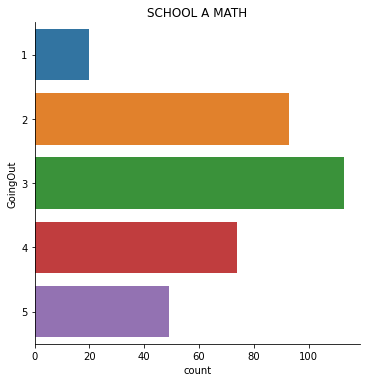

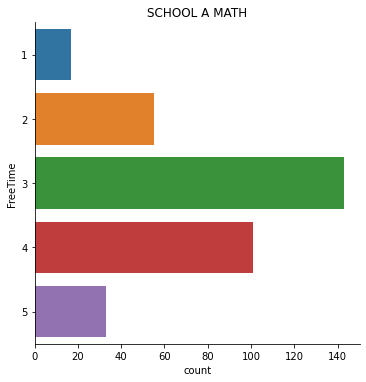

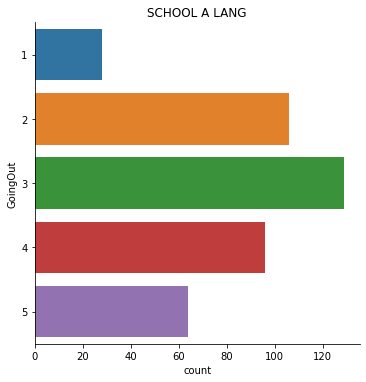

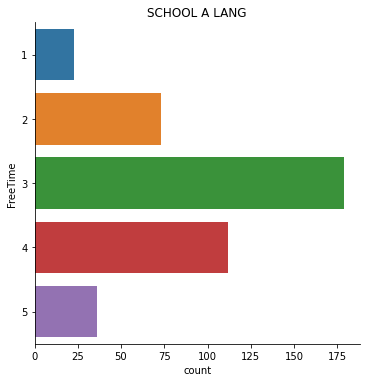

In [35]:
sb.catplot(data=schoolA_math_useful,y=schoolA_math_useful.columns[3],kind="count").set(title="SCHOOL A MATH")
sb.catplot(data=schoolA_math_useful,y=schoolA_math_useful.columns[4],kind="count").set(title="SCHOOL A MATH")
sb.catplot(data=schoolA_lang_useful,y=schoolA_math_useful.columns[3],kind="count").set(title="SCHOOL A LANG")
sb.catplot(data=schoolA_lang_useful,y=schoolA_math_useful.columns[4],kind="count").set(title="SCHOOL A LANG")

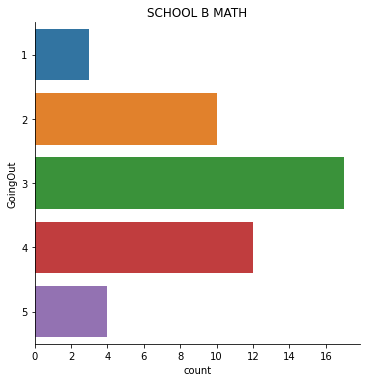

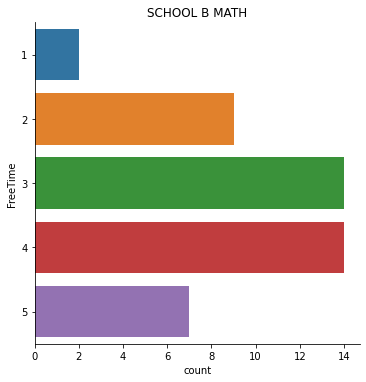

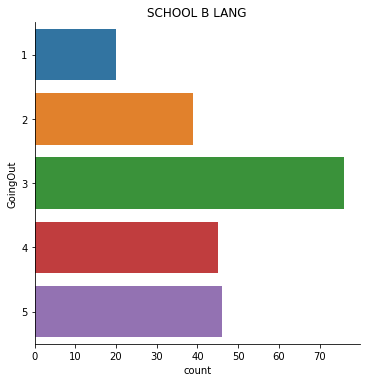

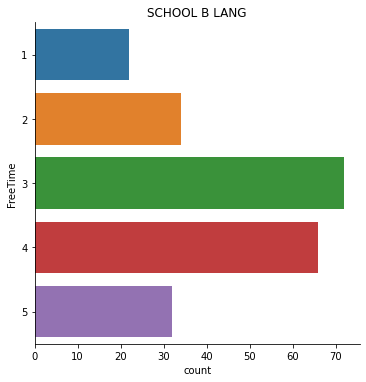

In [36]:
sb.catplot(data=schoolB_math_useful,y=schoolA_math_useful.columns[3],kind="count").set(title="SCHOOL B MATH")
sb.catplot(data=schoolB_math_useful,y=schoolA_math_useful.columns[4],kind="count").set(title="SCHOOL B MATH")
sb.catplot(data=schoolB_lang_useful,y=schoolA_math_useful.columns[3],kind="count").set(title="SCHOOL B LANG")
sb.catplot(data=schoolB_lang_useful,y=schoolA_math_useful.columns[4],kind="count").set(title="SCHOOL B LANG")

In [37]:
print("SCHOOL A MATH")
print("\t")
print(schoolA_math_useful.mean())

print("\t")
print("\t")

print("SCHOOL B MATH")
print("\t")
print(schoolB_math_useful.mean())



SCHOOL A MATH
	
MomEdu       2.802292
DadEdu       2.553009
StudyTime    2.063037
GoingOut     3.111748
FreeTime     3.223496
dtype: float64
	
	
SCHOOL B MATH
	
MomEdu       2.347826
DadEdu       2.282609
StudyTime    1.826087
GoingOut     3.086957
FreeTime     3.326087
dtype: float64


In [38]:
print("SCHOOL A LANG")
print("\t")
print(schoolA_lang_useful.mean())

print("\t")
print("\t")

print("SCHOOL B LANG")
print("\t")
print(schoolB_lang_useful.mean())

SCHOOL A LANG
	
MomEdu       2.725768
DadEdu       2.475177
StudyTime    2.014184
GoingOut     3.146572
FreeTime     3.153664
dtype: float64
	
	
SCHOOL B LANG
	
MomEdu       2.119469
DadEdu       1.991150
StudyTime    1.774336
GoingOut     3.256637
FreeTime     3.230088
dtype: float64


## Q4)

__Using previous answers...__

School A performs academically better compared to School B perhaps due to the following reasons:
- School A has a higher average parent education level than School B, influencing student grades positively
- School A has a higher average study time for both subjects compared to school B
- School A has a lower average going out time than School B
- School A has a more appropriate amount of free time for students compared to School B (can be seen from boxplots)

## Q5) How do the students perform over time? Are they consistent across terms, or do they gradually improve?

[Text(0.5, 1.0, 'LANG')]

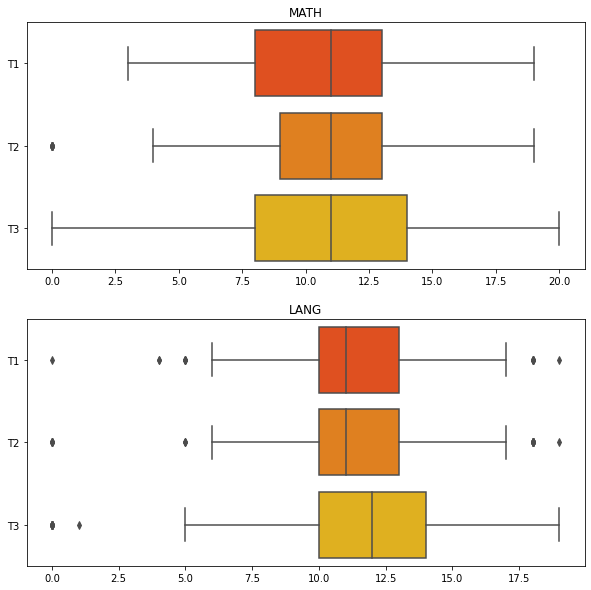

In [39]:
f,axes=plt.subplots(2,1,figsize=(10,10))

sb.boxplot(data=terms_scores_math,orient="h",ax=axes[0],palette="autumn").set(title="MATH")
sb.boxplot(data=terms_scores_lang,orient="h",ax=axes[1],palette="autumn").set(title="LANG")


In [40]:
terms_scores_math.describe()

,T1,T2,T3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [41]:
terms_scores_lang.describe()

,T1,T2,T3
count,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009
std,2.745265,2.913639,3.230656
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000
50%,11.000000,11.000000,12.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,19.000000


[Text(0.5, 1.0, 'LANG')]

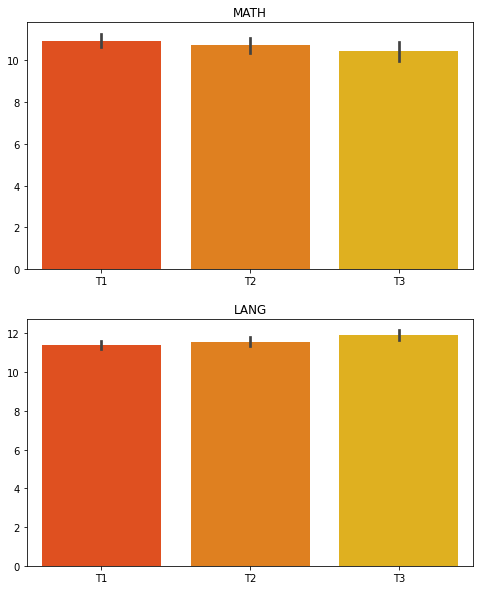

In [42]:
f,axes=plt.subplots(2,1,figsize=(8,10))

sb.barplot(data=terms_scores_math,orient="v",ax=axes[0],palette="autumn").set(title="MATH")
sb.barplot(data=terms_scores_lang,orient="v",ax=axes[1],palette="autumn").set(title="LANG")


## Q5)

For Math subject:
- There is a very small decreasing trend in mean grade over the academic year
- Boxplots/ Median still very similar across all 3 terms
- Barplots actually show a small decreasing trend
- Grades mostly consistent with time, with a small drop in mean

For Lang subject:
- There is small increasing trend in mean grade over the academic year
- Boxplots/ Median show an increasing trend, evident from term 2 to term 3
- Barplots show a steady increasing trend over time with very small variance
- Grade mostly consistent for the first 2 terms, significant improvement from term 2 to term 3







## Q6) Are there any other factors that can influence student performance?

In [43]:
Others_math=pd.DataFrame(mathDf[["PastFails","Health","Residence","Internet","TravelTime"]])
Others_lang=pd.DataFrame(langDf[["PastFails","Health","Residence","Internet","TravelTime"]])



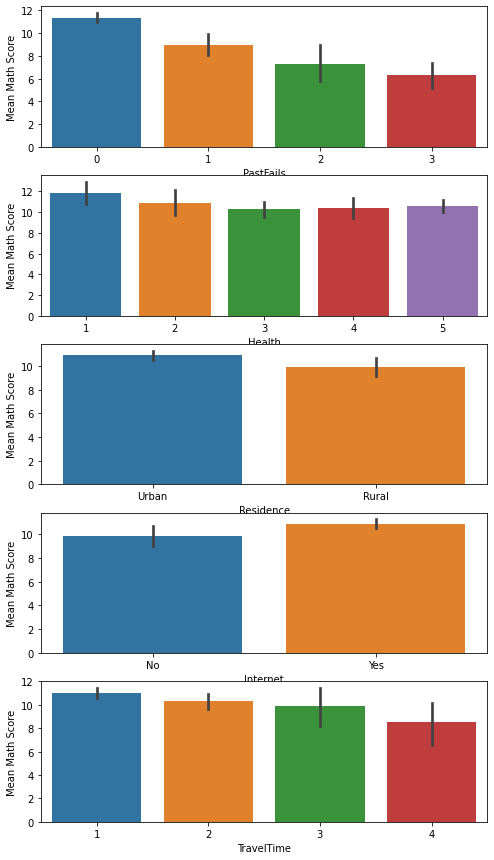

In [44]:
print_barplots(mean_math,Others_math)

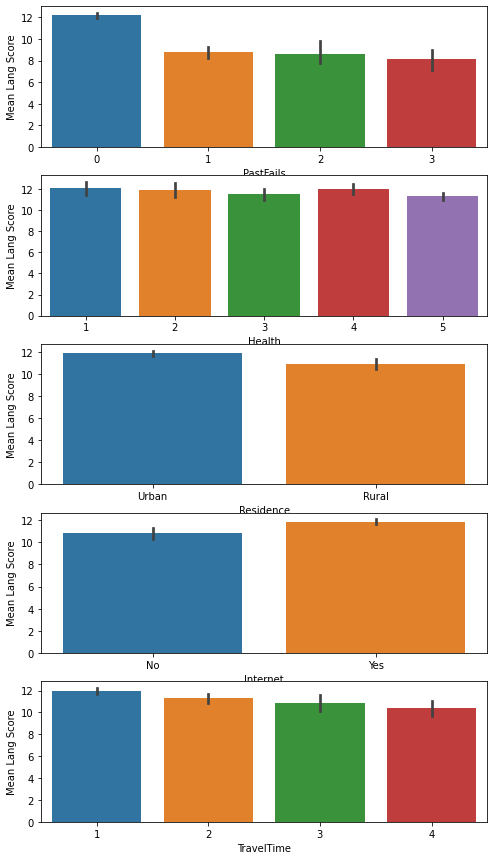

In [45]:
print_barplots(mean_lang,Others_lang)

## Q6)
Environmental factors such as type of residence, internet access and travel time have quite a __significant influence__ on student performance. This is because from the barplots:
- Students who stay in urban areas have a higher median score compared to those who stay in rural areas for both subjects.
- For both subjects, students who have access to internet perform better than those who do not
- Student performance has __slight negative relationship__ with travel time, the higher the travel time to their respective schools, the lower the student performance for both subjects. 


Historical factors such as number of class failures in the past, has actually a __significant impact__ on student performance. This is because from the barplot:
- Students with 0 past class failures have a way higher median than the rest of the categories
- There is __moderate negative relationship__ between past class failures and student performance, students with 3 past class failures have an extremely low median.


Well-being factors such as students health have little influence on student academic performance. This is because from the barplots:
- There is __no clear trend__ between health and student performance for both subjects


In conclusion, environmental and historical factors would be useful in predicting the academic performance of a student, since these factors do influence student performance either negatively or positively.

## Q7) Bonus question : Looking at the students who take both subjects(math and lang), are the variables identified earlier useful in predicting their overall student performance?

In [46]:
combinedDf["_merge"]=(combinedDf.T1+combinedDf.T2+combinedDf.T3+combinedDf.L_T1+combinedDf.L_T2+combinedDf.L_T3)/6
combinedDf=combinedDf.rename(columns={"_merge":"student performance"})
combinedDf.head(10)

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,FreeTime,GoingOut,Health,T1,T2,T3,L_T1,L_T2,L_T3,student performance
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,3,4,3,5.0,6.0,6.0,0.0,11.0,11.0,6.500000
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,3,3,3,5.0,5.0,6.0,9.0,11.0,11.0,7.833333
6,SchoolA,Male,16,Urban,2,2,Other,Other,1,2,...,4,4,3,12.0,12.0,11.0,13.0,12.0,13.0,12.166667
7,SchoolA,Female,17,Urban,4,4,Other,Teacher,2,2,...,1,4,1,6.0,5.0,6.0,10.0,13.0,13.0,8.833333
11,SchoolA,Female,15,Urban,2,1,CivilService,Other,3,3,...,2,2,4,10.0,12.0,12.0,10.0,12.0,13.0,11.500000
14,SchoolA,Male,15,Urban,2,2,Other,Other,1,3,...,5,2,3,14.0,16.0,16.0,14.0,14.0,15.0,14.833333
15,SchoolA,Female,16,Urban,4,4,HealthCare,Other,1,1,...,4,4,2,14.0,14.0,14.0,17.0,17.0,17.0,15.500000
17,SchoolA,Female,16,Urban,3,3,Other,Other,3,2,...,3,2,4,8.0,10.0,10.0,13.0,14.0,14.0,11.500000
20,SchoolA,Male,15,Urban,4,3,Teacher,Other,1,2,...,4,1,1,13.0,14.0,15.0,12.0,13.0,14.0,13.500000
21,SchoolA,Male,15,Urban,4,4,HealthCare,HealthCare,1,1,...,4,2,5,12.0,15.0,15.0,11.0,12.0,12.0,12.833333


In [47]:
student_performance=pd.DataFrame(combinedDf["student performance"])
student_performance.describe()

important_factors=pd.DataFrame(combinedDf[["MomEdu","DadEdu","StudyTime","GoingOut","PastFails","TravelTime"]])

important_factors.head()
student_performance.head()


,student performance
0,6.500000
1,7.833333
6,12.166667
7,8.833333
11,11.500000


In [48]:
Df=pd.concat([important_factors,student_performance],axis=1)
Df.head()

,MomEdu,DadEdu,StudyTime,GoingOut,PastFails,TravelTime,student performance
0,4,4,2,4,0,2,6.500000
1,1,1,2,3,0,1,7.833333
6,2,2,2,4,0,1,12.166667
7,4,4,2,4,0,2,8.833333
11,2,1,3,2,0,3,11.500000


In [49]:
Df=pd.concat([important_factors,student_performance],axis=1)

for i in range(6):
    Df[str(Df.columns[i])] = (Df[str(Df.columns[i])] - Df[str(Df.columns[i])].min())/(Df[str(Df.columns[i])].max() - Df[str(Df.columns[i])].min())



x=Df
y=pd.DataFrame(Df["student performance"])
x=pd.DataFrame(Df[["MomEdu","DadEdu","StudyTime","GoingOut","PastFails","TravelTime"]])




In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [51]:
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 50/162,random_state=9)

## LINEAR REGRESSION MODEL

Intercept of Regression 	: b =  [9.99090751]
Coefficients of Regression 	: a =  [[ 0.61888421  1.58304724  1.66539711 -0.31422885 -4.63914356  0.56328805]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.16048272113685136
Mean Squared Error (MSE) 	: 7.170757777749872

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.00861771184370752
Mean Squared Error (MSE) 	: 8.38776609468643



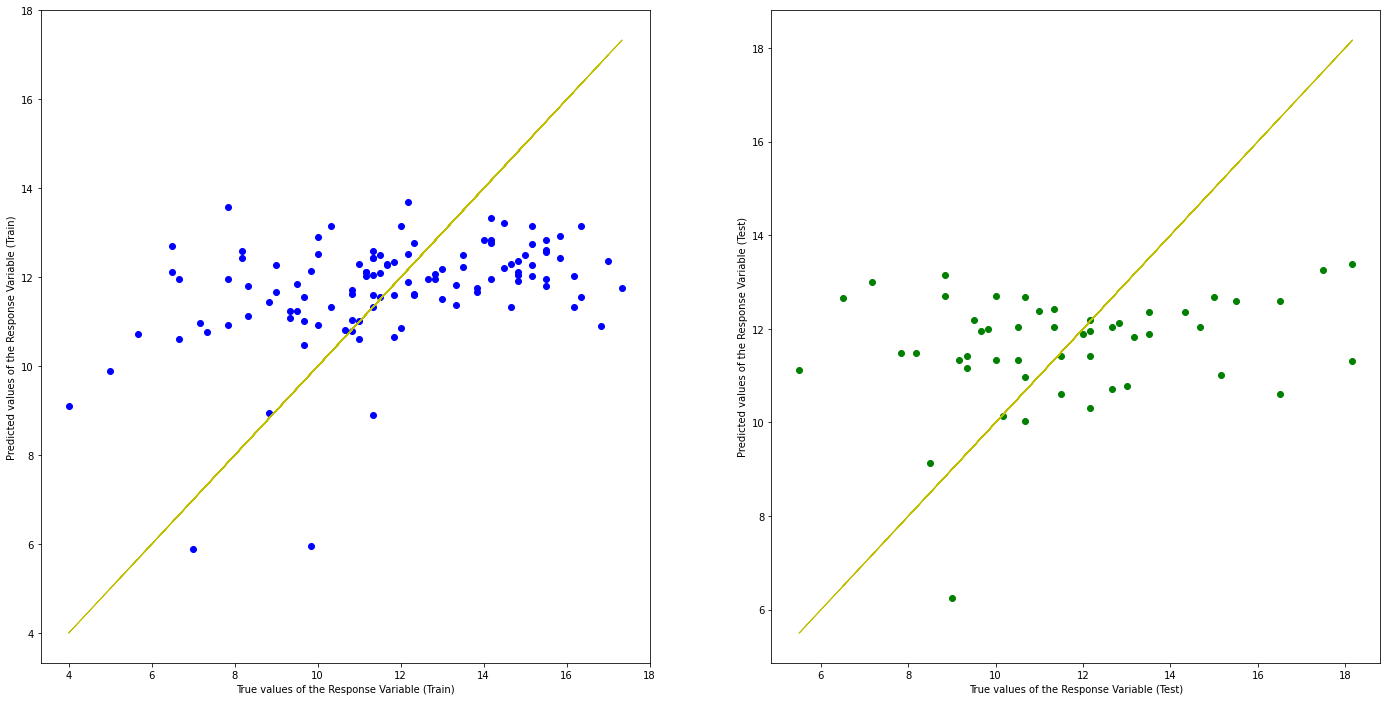

In [52]:
linreg = LinearRegression()         
linreg.fit(x_train, y_train)        


print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'y-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'y-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

__Assumptions__: 
- 0 < score <=10 : Grade D
- 10 < score <=13 : Grade C
- 13 < score <=16 : Grade B
- 16 < score <=20 : Grade A


In [53]:
student_performance=pd.DataFrame(combinedDf["student performance"])
student_performance.describe()

important_factors=pd.DataFrame(combinedDf[["MomEdu","DadEdu","StudyTime","GoingOut","PastFails","Internet","Residence","TravelTime"]])



important_factors.head(20)


tostr ={"Urban":0,"Rural":1,"Yes":1,"No":0}
important_factors.Residence=important_factors.Residence.replace(["Urban","Rural"],[1,0])
important_factors.Internet=important_factors.Internet.replace(["Yes","No"],[1,0])

important_factors.head(20)


x=pd.DataFrame(important_factors)
y=pd.DataFrame(Df["student performance"])

y["Grade"]="A"

y.loc[(y['student performance'] >= 0) & (y['student performance'] <= 10), 'Grade'] = "D"
y.loc[(y['student performance'] > 10) & (y['student performance'] <= 13), 'Grade'] = 'C'
y.loc[(y['student performance'] > 13) & (y['student performance'] <= 16), 'Grade'] = 'B'
y.loc[(y['student performance'] > 16) & (y['student performance'] <= 20), 'Grade'] = 'A'

y=pd.DataFrame(y["Grade"])

y=y.astype("category")
y.dtypes
x=x.astype("int64")
y.head(20)

,Grade
0,D
1,D
6,C
7,D
11,C
14,B
15,B
17,C
20,B
21,C


## RANDOM FOREST MODEL

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8125

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5



<AxesSubplot:>

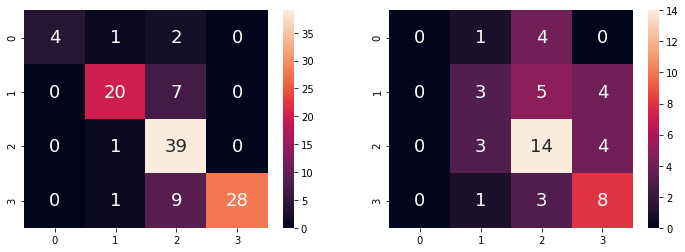

In [65]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


x_train, x_test , y_train , y_test = train_test_split(x,y, test_size = 50/162,random_state=36)





rforest = RandomForestClassifier(n_estimators = 10000, max_depth = 6)  
rforest.fit(x_train, y_train.values.ravel())                        


y_train_pred = rforest.predict(x_train)
y_test_pred = rforest.predict(x_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(x_train, y_train))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(x_test, y_test))
print()


f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])




In [55]:
feature_importances = pd.DataFrame(rforest.feature_importances_)
feature_importances['Predictors'] = x.columns



feature_importances=feature_importances.rename(columns={feature_importances.columns[0]:"Importance"})
feature_importances

,Importance,Predictors
0,0.140069,MomEdu
1,0.151476,DadEdu
2,0.143368,StudyTime
3,0.184747,GoingOut
4,0.097253,PastFails
5,0.084741,Internet
6,0.093790,Residence
7,0.104557,TravelTime


## CREATING ARBITARY STUDENT BOB

In [56]:
data = [[2,2,5,1,0,1,1,1]] 
BOB = pd.DataFrame(data, columns = ["MomEdu","DadEdu","StudyTime","GoingOut","PastFails","Internet","Residence","TravelTime"])

print("BOB's data")
BOB

BOB's data


,MomEdu,DadEdu,StudyTime,GoingOut,PastFails,Internet,Residence,TravelTime
0,2,2,5,1,0,1,1,1


In [57]:
Y_pred = rforest.predict(BOB)
print("Using our random forest model, the predicted student performance for BOB is",Y_pred[0],"!")

Using our random forest model, the predicted student performance for BOB is B !


## Q7)
After using linear regression and random forest models to gauge student performance, I found that linear regression as a model may not be as useful to predict student peformance since it has a low explained variance. The random forest model is more suitable in predicting the grade range for student performance scoring a high classification accuracy of 0.8125 for the training set and 0.5 for the test set.

Random Forest importance of feature shows that the highest importance in predicting student performance is Going out variable, implying that perhaps the amount of time spent going out has the most significant influence on student performance.

In conclusion, after performing EDA on most variables in the dataset and identifying useful ones, a random forest model like the above one could be used to have a good gauge of student performance!
